### ***Importing Essential Libraries***

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### ***Loading the Netflix Dataset***

In [11]:
df= pd.read_csv('/content/mymoviedb.csv',lineterminator='\n')

### ***Exploring the Dataset Structure***

In [12]:
print("First 5 Rows of the Dataset:")
display(df.head())

print("\nDataset Information:")
df.info()


First 5 Rows of the Dataset:


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


### ***Initial Data Inspection & Summary Statistics***

In [13]:
# Preview the 'Genre' column
print("Sample Genres:")
print(df['Genre'].head())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())

# Display summary statistics for numerical columns
print("\nStatistical Summary of Numerical Features:")
print(df.describe())


Sample Genres:
0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

Number of Duplicate Rows:
0

Statistical Summary of Numerical Features:
        Popularity    Vote_Count  Vote_Average
count  9827.000000   9827.000000   9827.000000
mean     40.326088   1392.805536      6.439534
std     108.873998   2611.206907      1.129759
min      13.354000      0.000000      0.000000
25%      16.128500    146.000000      5.900000
50%      21.199000    444.000000      6.500000
75%      35.191500   1376.000000      7.100000
max    5083.954000  31077.000000     10.000000


### ***Exploration Summary***

* Our dataset contains **9827 rows and 9 columns**.

*  The data appears mostly clean, with **no duplicate rows.**

*  The Release_Date column is currently stored as an object and should be converted to datetime format. We’ll also extract the year for better temporal analysis.

*  Columns like **Overview, Original_Language, and Poster_Url are not critical** for this analysis and can be safely dropped.

*  The Genre column contains comma-separated values with extra whitespace, which need to be split and cleaned. These should be further processed into categorical features.

*  The Popularity column shows extreme outliers, which might need to be treated or visualized carefully.

*  Vote_Average can be categorized into rating levels (e.g., Low, Medium, High) for more insightful group-based analysis.






### ***Data Cleaning & Feature Preparation***

In [14]:
# Convert 'Release_Date' to datetime format and extract the year
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Year'] = df['Release_Date'].dt.year

# Drop non-essential columns for this analysis
columns_to_drop = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Rename column for clarity and inspect remaining columns
df.drop('Release_Date', axis=1, inplace=True)
print(df.columns)


Index(['Title', 'Popularity', 'Vote_Count', 'Vote_Average', 'Genre',
       'Release_Year'],
      dtype='object')


### ***Binning Continuous Ratings into Categorical Levels***

In [15]:
# Function to categorize a continuous column based on quartiles
def categorize_col(df, col, labels):
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop')
    return df

# Define category labels and apply to 'Vote_Average'
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)

# Drop any rows with NaN (if generated during binning)
df.dropna(inplace=True)

# Check for remaining missing values
print(df.isna().sum())

# Preview cleaned and categorized data
df.head()


Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
Release_Year    0
dtype: int64


,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,below_avg,Thriller,2022
3,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War",2021


### ***Genre Column Cleanup & Transformation***

In [16]:
# Split multi-genre strings into lists
df['Genre'] = df['Genre'].str.split(', ')

# Explode the list so that each genre gets its own row
df = df.explode('Genre').reset_index(drop=True)

# Convert the Genre column to categorical type
df['Genre'] = df['Genre'].astype('category')

# Optional checks
print(df['Genre'].dtype)
print(df.info())
print(df.nunique())
df.head()


category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         25552 non-null  object  
 1   Popularity    25552 non-null  float64 
 2   Vote_Count    25552 non-null  int64   
 3   Vote_Average  25552 non-null  category
 4   Genre         25552 non-null  category
 5   Release_Year  25552 non-null  int32   
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB
None
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
Release_Year     100
dtype: int64


,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021
3,The Batman,3827.658,1151,popular,Crime,2022
4,The Batman,3827.658,1151,popular,Mystery,2022


### ***Data Visualization***

### ***Most frequent genre of movies released on Nelflix { Visualizing Genre Distribution }***

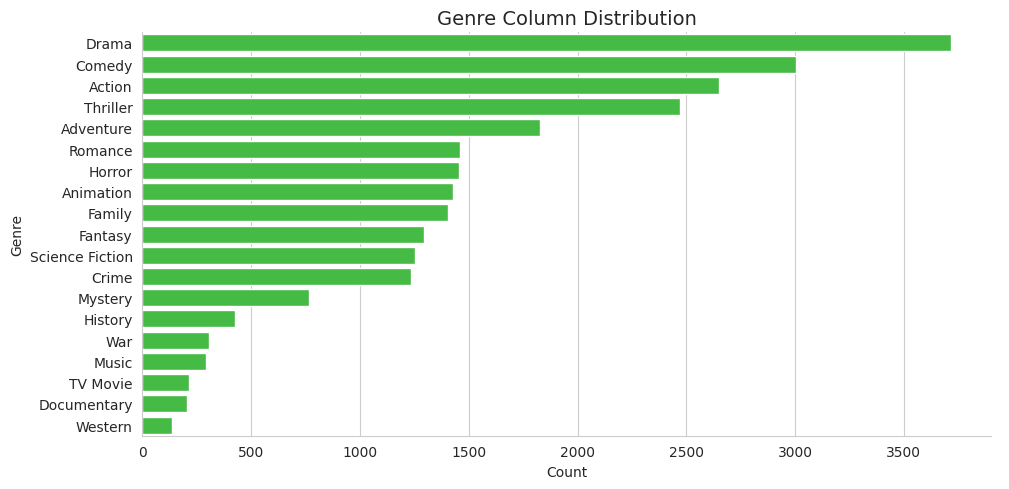

In [18]:
# Set Seaborn style for better aesthetics
sns.set_style('whitegrid')

# Plot genre distribution
sns.catplot(
    y='Genre',
    data=df,
    kind='count',
    aspect=2,
    order=df['Genre'].value_counts().index,
    color='#32CD32'
)

plt.title("Genre Column Distribution", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### ***Highest votes in Vote Average column { Visualizing Vote_Average Distribution }***

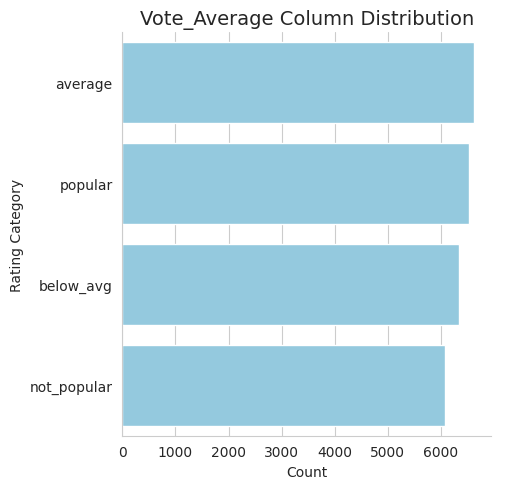

In [20]:
# Plot the distribution of categorized Vote_Average
sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    order=df['Vote_Average'].value_counts().index,
    color='#87CEEB'
)

plt.title("Vote_Average Column Distribution", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Rating Category")
plt.tight_layout()
plt.show()


***Identifying the Most Popular Movie***

In [23]:
# Display the movie with the highest popularity score
most_popular_movie = df[df['Popularity'] == df['Popularity'].max()]
most_popular_movie

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,popular,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,popular,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction,2021


In [24]:
print("Most Popular Movie:", most_popular_movie['Title'].values[0])


Most Popular Movie: Spider-Man: No Way Home


***Identifying the Least Popular Movie***

In [25]:
# Display the movie with the lowest popularity score
least_popular_movie = df[df['Popularity'] == df['Popularity'].min()]
least_popular_movie


,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25546,The United States vs. Billie Holiday,13.354,152,average,Music,2021
25547,The United States vs. Billie Holiday,13.354,152,average,Drama,2021
25548,The United States vs. Billie Holiday,13.354,152,average,History,2021
25549,Threads,13.354,186,popular,War,1984
25550,Threads,13.354,186,popular,Drama,1984
25551,Threads,13.354,186,popular,Science Fiction,1984


In [26]:
print("Least Popular Movie:", least_popular_movie['Title'].values[0])

Least Popular Movie: The United States vs. Billie Holiday


***Distribution of Movie Releases Over the Years***

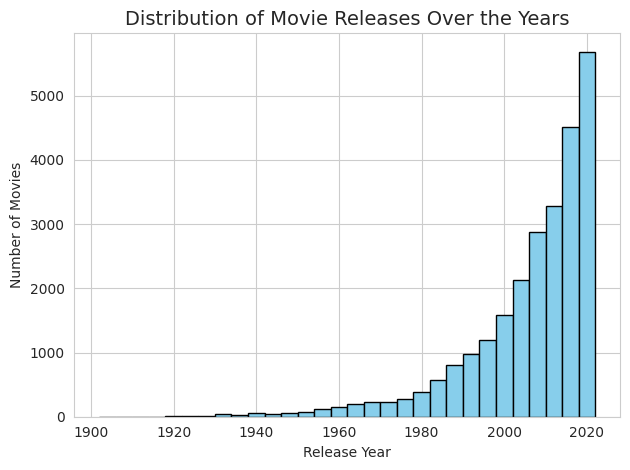

In [32]:
# Plot histogram of movie release years
df['Release_Year'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Distribution of Movie Releases Over the Years", fontsize=14)
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


In [29]:
# Find the year with the most movie releases
most_movies_year = df['Release_Year'].value_counts().idxmax()
movie_count = df['Release_Year'].value_counts().max()

print(f"The year with the most movie releases is {most_movies_year} with {movie_count} movies.")


The year with the most movie releases is 2021 with 1636 movies.


# ***Conclusion***

* The most frequent genre in the dataset is **drama**, indicating a strong audience preference or content focus in that category.

*  When analyzing votes, the genres with the highest average vote scores are ***drama***, reflecting viewer satisfaction or critical acclaim within these categories.

*  The movie with the highest popularity is "***Spider-Man: No Way Home***", which belongs to the ***Action, Adventure, and Science Fiction*** genre. This suggests high viewership, engagement, or promotional success.

*  The movie with the lowest popularity is "***The United States vs. Billie Holiday***", and it falls under the Music, Drama, History genre. This may point to niche appeal or low audience interest.

* The year with the most movie releases is ***2021***, which could reflect a boom in content production, expansion of the streaming platform, or broader trends in the film industry during that time.